1 Filling gaps in lecture notes (10pts)

1.1 Optimal regression function

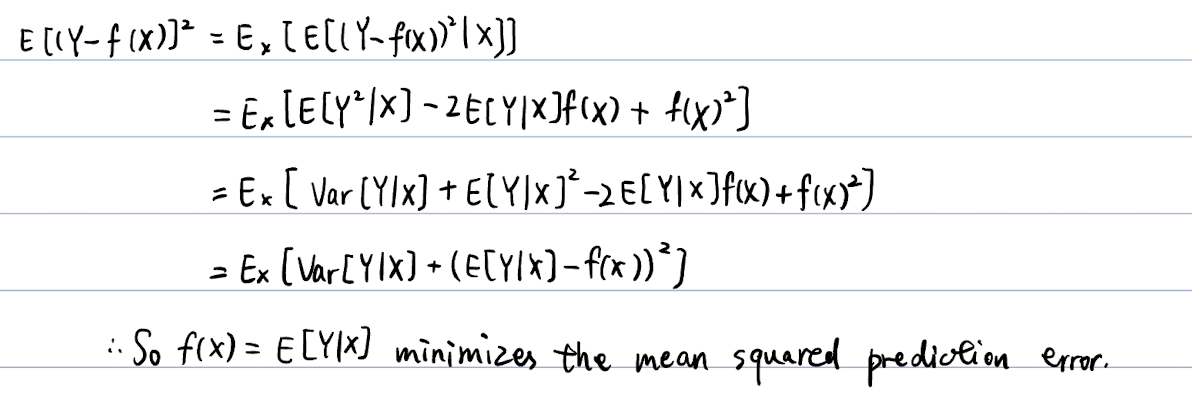

1.2 Bias-variance trade-off

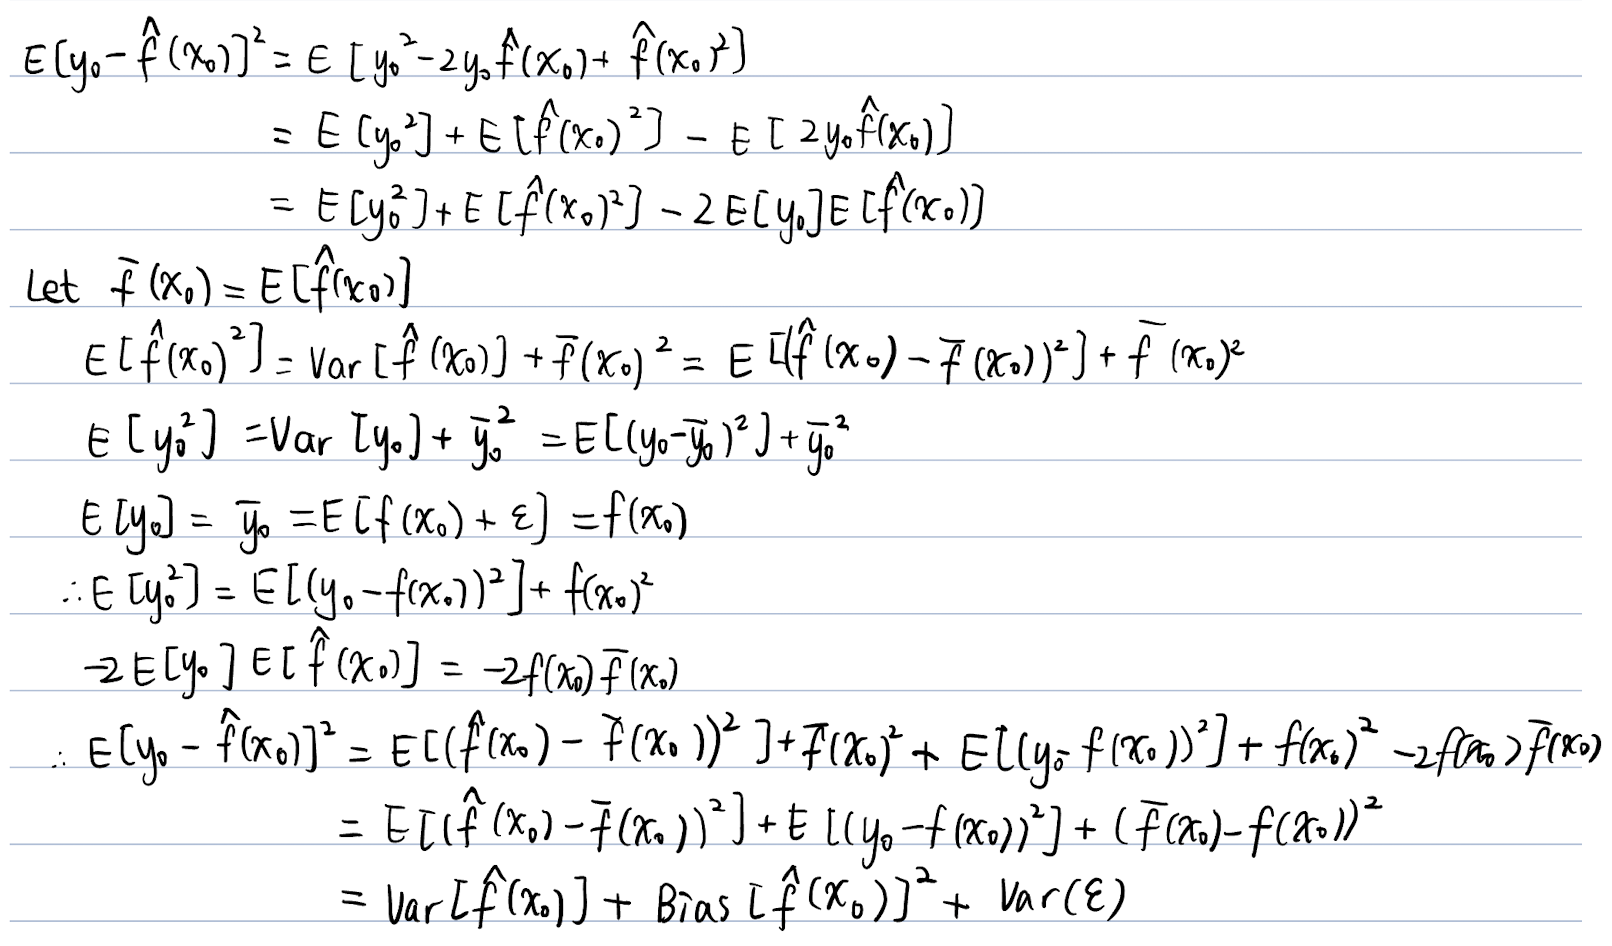

2 ISL Exercise 2.4.3 (10pts)

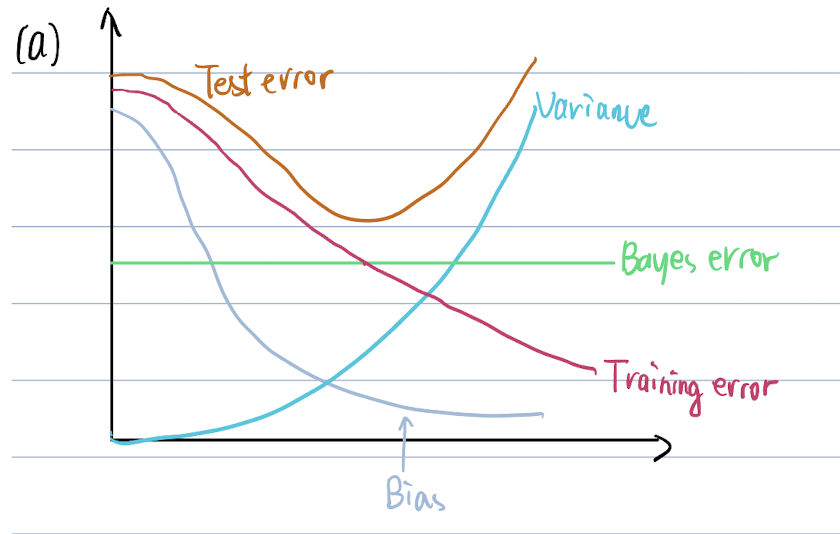

(b)

i. (squared) bias : decreases when flexibility increases because higher flexibility could yield a closer fit.

ii. variance : increases when flexibility increases because higher flexibility could yield overfit when considering variance.

iii. training error : decreases when flexibility increases because higher flexibility could yield a closer fit.

iv. test error : concave up curve because increase in flexibility could yield a closer fit before it overfits.

v. Bayes (or irreducible) error : remains the same when flexibility increases. When the training error is lower than the Bayes error, there would be an overfit.
The Bayes error rate is defined for classification problems and is determined by the ratio of data points which lie at the 'wrong' side of the decision boundary.


3 ISL Exercise 2.4.4 (10pts)

(a) 

i. spam email recognization, response: spam or not spam, input: email that were previously recognized as spam, goal: inference.

ii. illness classification, response: ill, healthy, input: heart rate, breath rate, etc., goal: inference

iii. weather prediction, response: cloudy, sunny, rainy, snowy, input: history weather, goal: prediction

(b)

i. company's net profit prediction, response: company's net profit, input: historical company profits, indicators related to profits, such as operating income, assets and liabilities, management expenses, etc., goal: prediction

ii. income inference, response: income, input: education level, job position, industry, goal: inference

iii. stock price prediction, response: stock price, input: history stock price, company condition, goal: prediction

(c)

i. Netflix movie recommendations. Make movie recommendations based on users who have watched similar movies.

ii. market survey. Cluster customers through the customer's shopping behavior (consumption times, recent consumption time, consumption amount, etc.).

iii. picture type clustering. Cluster pictures based on its color, size and contents.

4 ISL Exercise 2.4.10 (30pts)

In [2]:
#(a)
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
Boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


There are 506 rows and 13 columns.

It means that there are 13 features, and 506 housing values in the dataset.

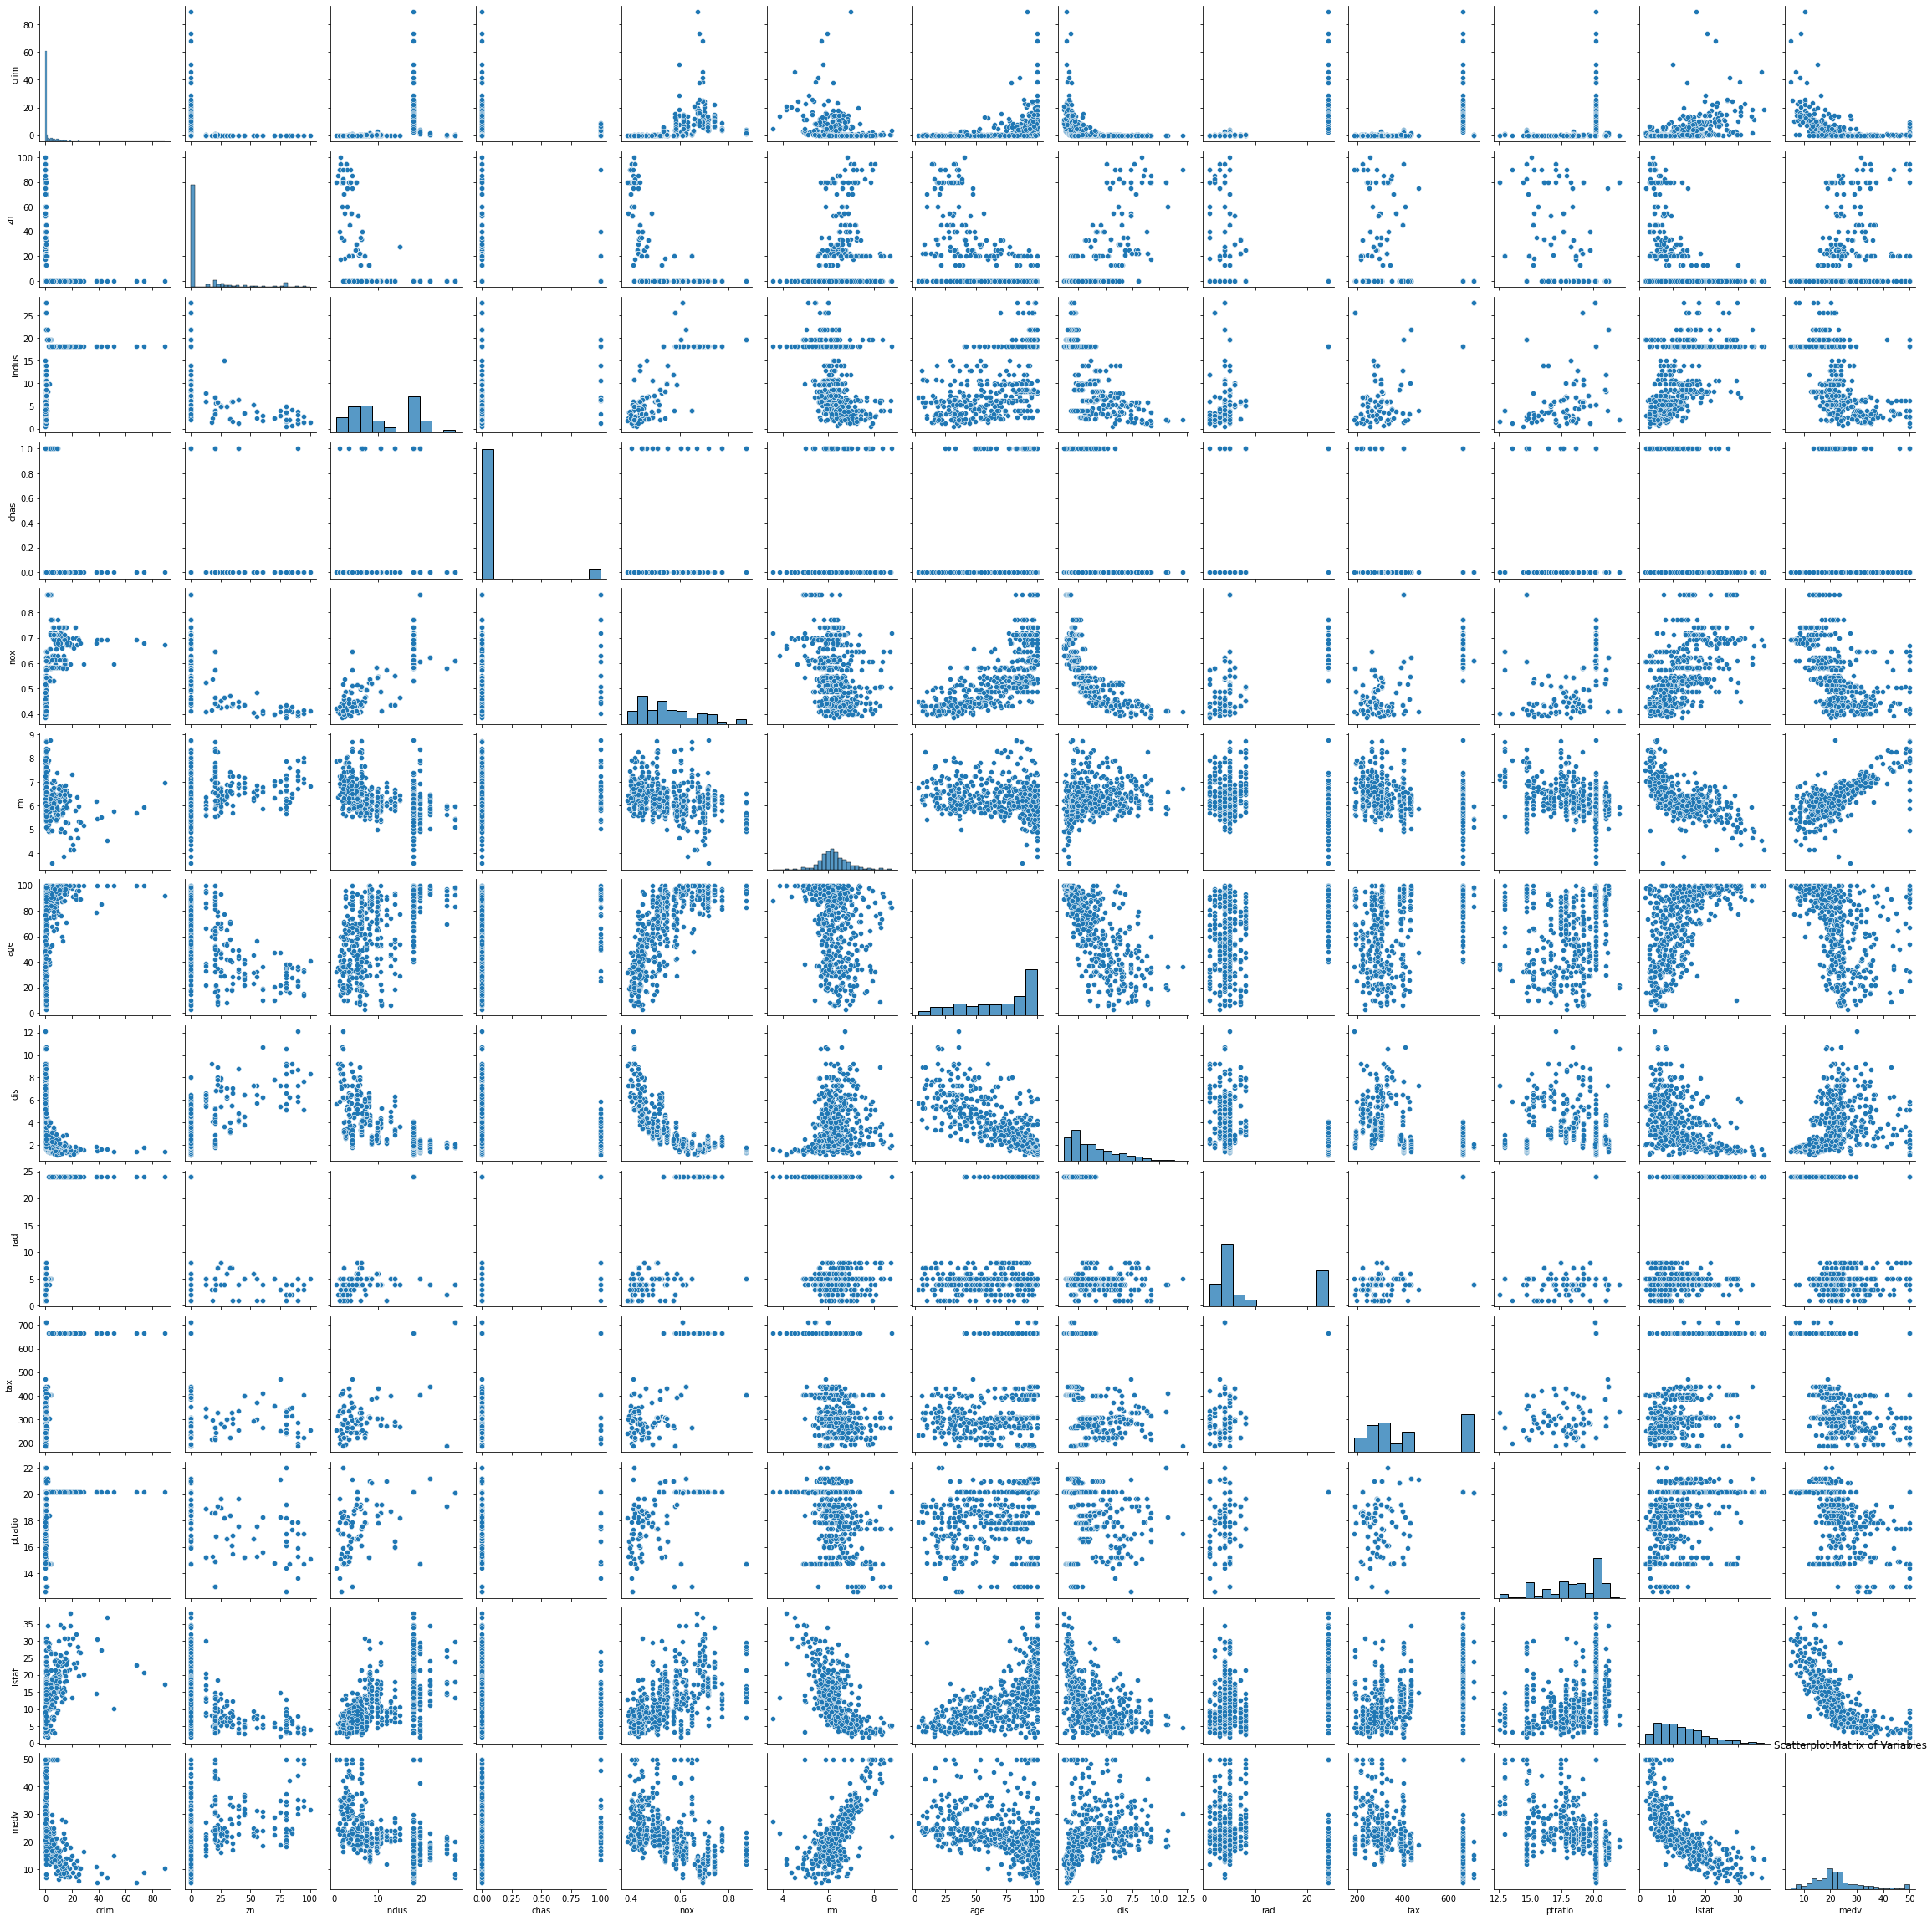

In [4]:
#(b)
import seaborn as sns
import matplotlib.pyplot as plt
# scatterplot matrix of variables
sns.pairplot(Boston)
plt.title("Scatterplot Matrix of Variables")
plt.show()

crim correlates with age, dis, rad, tax, ptratio

zn correlates with indus, nox, age, lstat

indus correlates with age, dis

nox correlates with age, dis

dis correlates with lstat

lstat correlates with medv

(c)

age, dis, rad, tax and ptratio are associated with crim.


From the scatterplots above, we can see that:

Older homes, more crime

Closer to work-area, more crime

Higher index of accessibility to radial highways, more crime

Higher tax rate, more crime

Higher pupil:teacher ratio, more crime.

In [13]:
#(d)
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


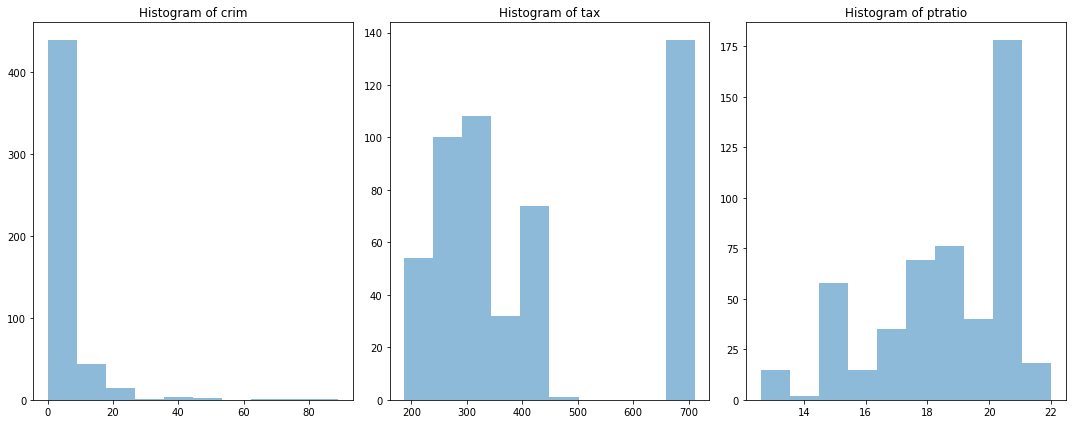

In [11]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (15,6))
ax1.hist(Boston['crim'], alpha = 0.5)
ax1.set_title("Histogram of crim")
ax2.hist(Boston['tax'], alpha = 0.5)
ax2.set_title("Histogram of tax")
ax3.hist(Boston['ptratio'], alpha = 0.5)
ax3.set_title("Histogram of ptratio")
plt.tight_layout()
plt.show()

From the histograms above, we can see that most cities have low crime rates, but there is a long tail. And there are still some suburbs appear to have a crime rate > 20, reaching to above 80.

There is a large divide between suburbs with low tax rates (approximately 187-450) and a peak at 660-700.

For ptratio, there is a skew towards high ratios, but the range is from 12.6 to 22, so there is no extremely high values.

In [20]:
#(e)
len(Boston[Boston['chas'].isin([1])])

35

35 census tracts in this data set bound the Charles river.

In [21]:
#(f)
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


The median pupil-teacher ratio among the towns in this data set is 19.05.

In [23]:
#(g)
Boston[Boston.medv==min(Boston.medv)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


399 and 406 census tracts of Boston have lowest median value of owneroccupied homes. The values of the other predictors for these census tracts are as above.

Compared with overall ranges for all predictors, their per capita crime rate are higher.

These two places are not the best place to live, but also not the worst.

In [24]:
#(h)
len(Boston[Boston.rm>7])

64

In [25]:
len(Boston[Boston.rm>8])

13

64 of the census tracts average more than seven rooms per dwelling. 13 of the census tracts average more than eight rooms per dwelling.

In [26]:
Boston[Boston.rm>8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000


They have lower crime, higher medv and lower lstat.

5 ISL Exercise 3.7.3 (12pts)

(a) 

Y = 50 + 20(gpa) + 0.07(iq) + 35(level) + 0.01(gpa * iq) - 10 (gpa * level)

i. Not correct. For a fixed value of IQ and GPA, high school graduates don't necessarily earn more, on average, than college graduates.

ii. Not correct. For a fixed value of IQ and GPA, college graduates don't necessarily earn more, on average, than high school graduates.

iii. Correct. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates provided that the GPA is high enough.

iv. Not correct.

So iii is correct.

(b)

Y = 50 + 20(gpa) + 0.07(iq) + 35(level) + 0.01(gpa * iq) - 10 (gpa * level)

= 50 + 20 * 4 + 0.07 * 110 + 35 * 1 + 0.01(4 * 110) - 10 (4 * 1)

= 137.1

137.1 thousands dollars.


(c) False. To determine whether the interaction term is statistically significant or not, we should look at the p-value of the regression coefficient, not the coefficient value.

6 ISL Exercise 3.7.15 (20pts)

In [30]:
#(a)
import statsmodels.formula.api as smf
model1 = smf.ols('crim ~ zn',data=Boston)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           5.51e-06
Time:                        17:07:26   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.000       3.634       5.273
zn            -0.0739      0.016     -4.594      0.000      -0.106      -0.042
==============================================================================
Omnibus:                      567.443   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32753.004
Skew:                           5.257   Prob(JB):                         0.00
Kurtosis:                      40.986   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model2 = smf.ols('crim ~ indus',data=Boston)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.45e-21
Time:                        17:08:32   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.002      -3.375      -0.753
indus          0.5098      0.051      9.991      0.000       0.410       0.610
==============================================================================
Omnibus:                      585.118   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41418.938
Skew:                           5.449   Prob(JB):                         0.00
Kurtosis:                      45.962   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model3 = smf.ols('crim ~ chas',data=Boston)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 14 Jan 2023   Prob (F-statistic):              0.209
Time:                        17:10:25   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.000       2.966       4.523
chas          -1.8928      1.506     -1.257      0.209      -4.852       1.066
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
model4 = smf.ols('crim ~ nox',data=Boston)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.75e-23
Time:                        17:53:49   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.000     -17.059     -10.381
nox           31.2485      2.999     10.419      0.000      25.356      37.141
==============================================================================
Omnibus:                      591.712   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43138.106
Skew:                           5.546   Prob(JB):                         0.00
Kurtosis:                      46.852   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model5 = smf.ols('crim ~ rm',data=Boston)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           6.35e-07
Time:                        17:10:16   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.000      13.872      27.092
rm            -2.6841      0.532     -5.045      0.000      -3.729      -1.639
==============================================================================
Omnibus:                      575.717   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36658.093
Skew:                           5.345   Prob(JB):                         0.00
Kurtosis:                      43.305   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model6 = smf.ols('crim ~ age',data=Boston)
results6 = model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.85e-16
Time:                        17:10:09   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.000      -5.633      -1.923
age            0.1078      0.013      8.463      0.000       0.083       0.133
==============================================================================
Omnibus:                      574.509   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36741.903
Skew:                           5.322   Prob(JB):                         0.00
Kurtosis:                      43.366   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model7 = smf.ols('crim ~ dis',data=Boston)
results7 = model7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           8.52e-19
Time:                        17:10:04   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.000       8.064      10.934
dis           -1.5509      0.168     -9.213      0.000      -1.882      -1.220
==============================================================================
Omnibus:                      576.519   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37426.729
Skew:                           5.348   Prob(JB):                         0.00
Kurtosis:                      43.753   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model8 = smf.ols('crim ~ rad',data=Boston)
results8 = model8.fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.69e-56
Time:                        17:10:54   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.000      -3.158      -1.416
rad            0.6179      0.034     17.998      0.000       0.550       0.685
==============================================================================
Omnibus:                      656.459   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75417.007
Skew:                           6.478   Prob(JB):                         0.00
Kurtosis:                      61.389   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model9 = smf.ols('crim ~ tax',data=Boston)
results9 = model9.fit()
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.36e-47
Time:                        17:11:20   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.000     -10.131      -6.926
tax            0.0297      0.002     16.099      0.000       0.026       0.033
==============================================================================
Omnibus:                      635.377   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63763.835
Skew:                           6.156   Prob(JB):                         0.00
Kurtosis:                      56.599   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model10 = smf.ols('crim ~ ptratio',data=Boston)
results10 = model10.fit()
results10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.94e-11
Time:                        17:11:37   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.000     -23.830     -11.464
ptratio        1.1520      0.169      6.801      0.000       0.819       1.485
==============================================================================
Omnibus:                      568.053   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34221.853
Skew:                           5.245   Prob(JB):                         0.00
Kurtosis:                      41.899   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model11 = smf.ols('crim ~ lstat',data=Boston)
results11 = model11.fit()
results11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.65e-27
Time:                        17:11:53   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.000      -4.694      -1.968
lstat          0.5488      0.048     11.491      0.000       0.455       0.643
==============================================================================
Omnibus:                      601.306   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49918.826
Skew:                           5.645   Prob(JB):                         0.00
Kurtosis:                      50.331   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model12 = smf.ols('crim ~ medv',data=Boston)
results12 = model12.fit()
results12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.17e-19
Time:                        17:12:19   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.000       9.961      13.632
medv          -0.3632      0.038     -9.460      0.000      -0.439      -0.288
==============================================================================
Omnibus:                      558.880   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32740.044
Skew:                           5.108   Prob(JB):                         0.00
Kurtosis:                      41.059   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All predictors except chas have statistically significant association with the response.

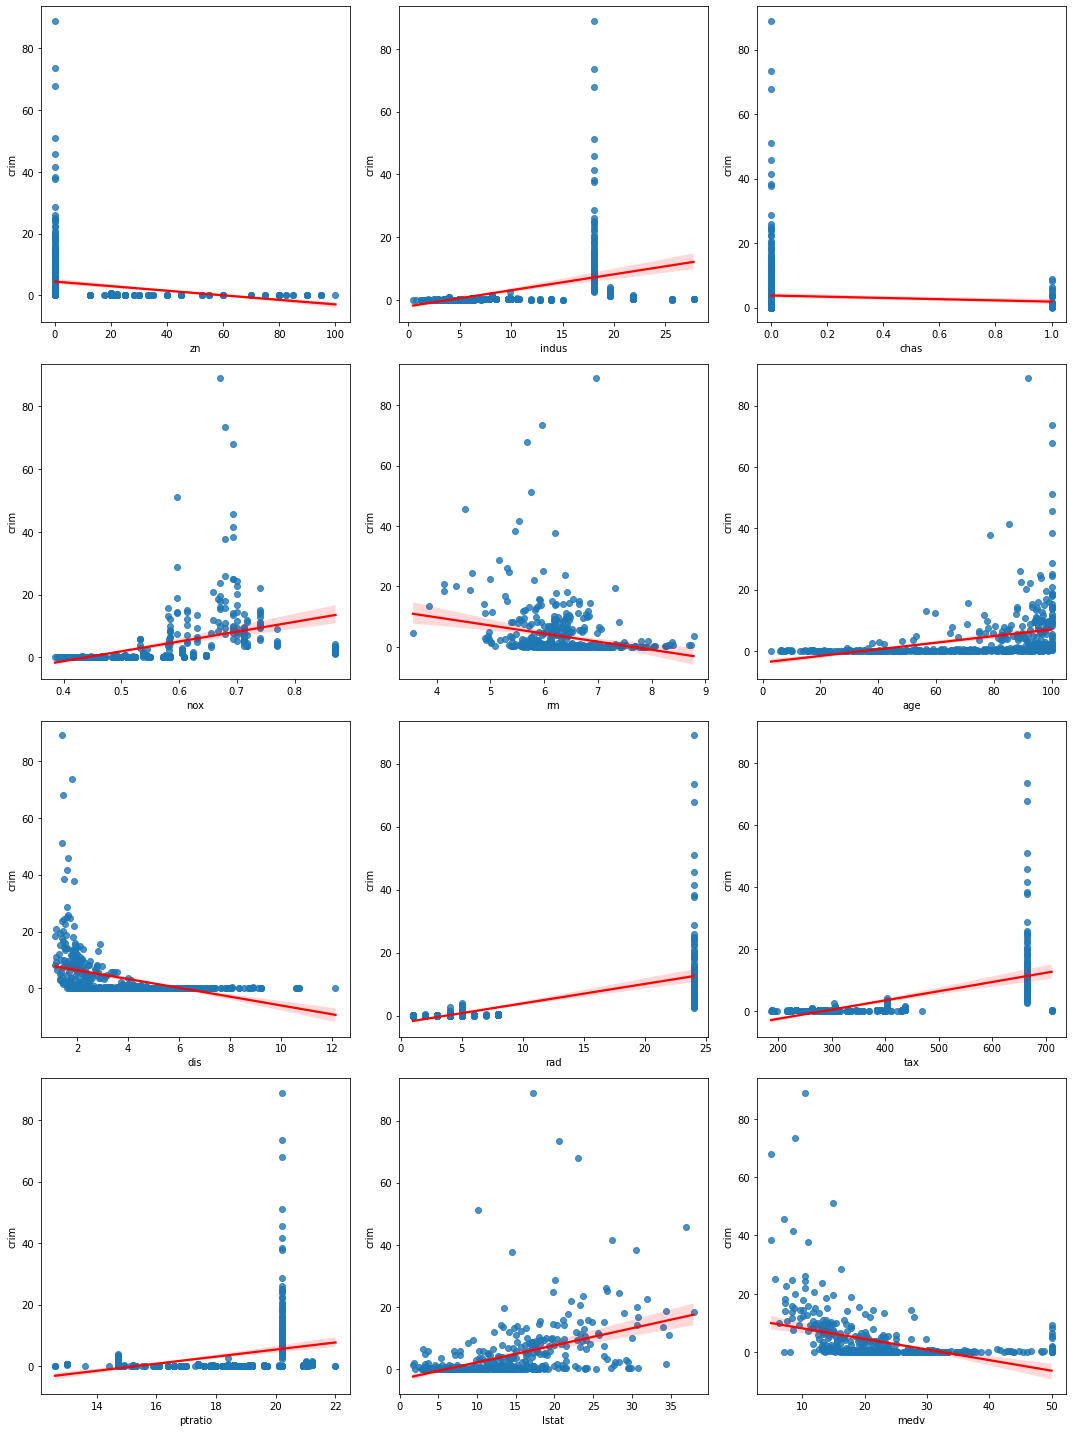

In [48]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]] 
= plt.subplots(4, 3, figsize = (15,20))
sns.regplot(x='zn', y='crim', data=Boston, line_kws={'color':'red'},
            ax=ax1)
sns.regplot(x='indus', y='crim', data=Boston, line_kws={'color':'red'},
            ax=ax2)
sns.regplot(x='chas', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax3)
sns.regplot(x='nox', y='crim', data=Boston, line_kws={'color':'red'},
            ax=ax4)
sns.regplot(x='rm', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax5)
sns.regplot(x='age', y='crim', data=Boston, line_kws={'color':'red'},
            ax=ax6)
sns.regplot(x='dis', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax7)
sns.regplot(x='rad', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax8)
sns.regplot(x='tax', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax9)
sns.regplot(x='ptratio', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax10)
sns.regplot(x='lstat', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax11)
sns.regplot(x='medv', y='crim', data=Boston, line_kws={'color':'red'}, 
            ax=ax12)

plt.tight_layout()
plt.show()

indus, nox, age, rad, tax, ptratio, lstat are positively associated with crim.
zn, rm, dis, medv are negatively associated with crim.

In [72]:
#(b)
model13 = smf.ols('crim ~ zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio
                  +lstat+medv',data=Boston)
results13 = model13.fit()
results13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.03e-56
Time:                        17:50:56   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The result is not so significant because most predictors are not statistically significant.

For zn, dis, rad and medv, we can reject the null hypothesis H0.

(c)

The result from (a) is quite different from result from (b).

In [73]:
data=pd.DataFrame()
data['x']=[list(results1.params)[1],
           list(results2.params)[1],
           list(results3.params)[1],
          list(results4.params)[1],
          list(results5.params)[1],
          list(results6.params)[1],
          list(results7.params)[1],
          list(results8.params)[1],
          list(results9.params)[1],
           list(results10.params)[1],
          list(results11.params)[1],
          list(results12.params)[1]]
data['y']=list(results13.params)[1:13]

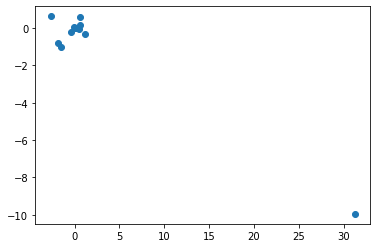

In [76]:
plt.scatter('x','y',data=data)

We can see that results a and results b are quite different, especially for nox.

In [78]:
#(d)
model14 = smf.ols('crim ~ zn+I(zn**2)+I(zn**3)',data=Boston)
results14 = model14.fit()
results14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.28e-06
Time:                        17:59:28   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.000       3.995       5.697
zn            -0.3322      0.110     -3.025      0.003      -0.548      -0.116
I(zn ** 2)     0.0065      0.004      1.679      0.094      -0.001       0.014
I(zn ** 3) -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
==============================================================================
Omnibus:                      569.133   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.991
Skew:                           5.272   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
results15 = smf.ols('crim ~ indus+I(indus**2)+I(indus**3)',data=Boston).fit()
results15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.55e-32
Time:                        18:02:43   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6626      1.574      2.327      0.020       0.570       6.755
indus            -1.9652      0.482     -4.077      0.000      -2.912      -1.018
I(indus ** 2)     0.2519      0.039      6.407      0.000       0.175       0.329
I(indus ** 3)    -0.0070      0.001     -7.292      0.000      -0.009      -0.005
==============================================================================
Omnibus:                      611.788   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51742.286
Skew:                           5.820   Prob(JB):                         0.00
Kurtosis:                      51.153   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
results16 = smf.ols('crim ~ chas+I(chas**2)+I(chas**3)',data=Boston).fit()
results16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 14 Jan 2023   Prob (F-statistic):              0.209
Time:                        18:03:16   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7444      0.396      9.453      0.000       2.966       4.523
chas            -0.6309      0.502     -1.257      0.209      -1.617       0.355
I(chas ** 2)    -0.6309      0.502     -1.257      0.209      -1.617       0.355
I(chas ** 3)    -0.6309      0.502     -1.257      0.209      -1.617       0.355
==============================================================================
Omnibus:                      561.663   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30645.429
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      39.685   Cond. No.                     1.07e+32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
results17 = smf.ols('crim ~ nox+I(nox**2)+I(nox**3)',data=Boston).fit()
results17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.81e-38
Time:                        18:03:43   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     233.0866     33.643      6.928      0.000     166.988     299.185
nox         -1279.3713    170.397     -7.508      0.000   -1614.151    -944.591
I(nox ** 2)  2248.5441    279.899      8.033      0.000    1698.626    2798.462
I(nox ** 3) -1245.7029    149.282     -8.345      0.000   -1538.997    -952.409
==============================================================================
Omnibus:                      614.412   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53523.997
Skew:                           5.851   Prob(JB):                         0.00
Kurtosis:                      52.008   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
results18 = smf.ols('crim ~ rm+I(rm**2)+I(rm**3)',data=Boston).fit()
results18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.07e-07
Time:                        18:04:08   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.6246     64.517      1.746      0.081     -14.132     239.382
rm           -39.1501     31.311     -1.250      0.212    -100.668      22.368
I(rm ** 2)     4.5509      5.010      0.908      0.364      -5.292      14.394
I(rm ** 3)    -0.1745      0.264     -0.662      0.509      -0.693       0.344
==============================================================================
Omnibus:                      585.097   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40144.207
Skew:                           5.465   Prob(JB):                         0.00
Kurtosis:                      45.245   Cond. No.                     5.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
results19 = smf.ols('crim ~ age+I(age**2)+I(age**3)',data=Boston).fit()
results19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.02e-20
Time:                        18:04:35   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5488      2.769     -0.920      0.358      -7.989       2.892
age             0.2737      0.186      1.468      0.143      -0.093       0.640
I(age ** 2)    -0.0072      0.004     -1.988      0.047      -0.014    -8.4e-05
I(age ** 3)  5.745e-05   2.11e-05      2.724      0.007     1.6e-05    9.89e-05
==============================================================================
Omnibus:                      577.477   Durbin-Watson:                   1.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39586.670
Skew:                           5.336   Prob(JB):                         0.00
Kurtosis:                      44.997   Cond. No.                     4.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
results20 = smf.ols('crim ~ dis+I(dis**2)+I(dis**3)',data=Boston).fit()
results20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.14e-35
Time:                        18:05:01   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.0476      2.446     12.285      0.000      25.242      34.853
dis           -15.5544      1.736     -8.960      0.000     -18.965     -12.144
I(dis ** 2)     2.4521      0.346      7.078      0.000       1.771       3.133
I(dis ** 3)    -0.1186      0.020     -5.814      0.000      -0.159      -0.079
==============================================================================
Omnibus:                      577.742   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42444.706
Skew:                           5.305   Prob(JB):                         0.00
Kurtosis:                      46.596   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
results21 = smf.ols('crim ~ rad+I(rad**2)+I(rad**3)',data=Boston).fit()
results21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.31e-55
Time:                        18:05:25   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6055      2.050     -0.295      0.768      -4.633       3.422
rad             0.5127      1.044      0.491      0.623      -1.538       2.563
I(rad ** 2)    -0.0752      0.149     -0.506      0.613      -0.367       0.217
I(rad ** 3)     0.0032      0.005      0.703      0.482      -0.006       0.012
==============================================================================
Omnibus:                      659.751   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77838.247
Skew:                           6.526   Prob(JB):                         0.00
Kurtosis:                      62.343   Cond. No.                     5.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
results22 = smf.ols('crim ~ tax+I(tax**2)+I(tax**3)',data=Boston).fit()
results22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           7.34e-50
Time:                        18:05:46   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.1836     11.796      1.626      0.105      -3.991      42.358
tax            -0.1533      0.096     -1.602      0.110      -0.341       0.035
I(tax ** 2)     0.0004      0.000      1.488      0.137      -0.000       0.001
I(tax ** 3) -2.204e-07   1.89e-07     -1.167      0.244   -5.91e-07    1.51e-07
==============================================================================
Omnibus:                      644.161   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69773.212
Skew:                           6.278   Prob(JB):                         0.00
Kurtosis:                      59.141   Cond. No.                     6.16e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
results23 = smf.ols('crim ~ ptratio+I(ptratio**2)+I(ptratio**3)',data=Boston).fit()
results23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           4.17e-13
Time:                        18:06:08   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         477.1840    156.795      3.043      0.002     169.129     785.239
ptratio           -82.3605     27.644     -2.979      0.003    -136.673     -28.048
I(ptratio ** 2)     4.6353      1.608      2.882      0.004       1.475       7.795
I(ptratio ** 3)    -0.0848      0.031     -2.743      0.006      -0.145      -0.024
==============================================================================
Omnibus:                      572.356   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36070.763
Skew:                           5.294   Prob(JB):                         0.00
Kurtosis:                      42.985   Cond. No.                     3.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
results24 = smf.ols('crim ~ lstat+I(lstat**2)+I(lstat**3)',data=Boston).fit()
results24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.35e-26
Time:                        18:06:37   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2010      2.029      0.592      0.554      -2.785       5.187
lstat            -0.4491      0.465     -0.966      0.335      -1.362       0.464
I(lstat ** 2)     0.0558      0.030      1.852      0.065      -0.003       0.115
I(lstat ** 3)    -0.0009      0.001     -1.517      0.130      -0.002       0.000
==============================================================================
Omnibus:                      607.734   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53621.219
Skew:                           5.726   Prob(JB):                         0.00
Kurtosis:                      52.114   Cond. No.                     5.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
results25 = smf.ols('crim ~ medv+I(medv**2)+I(medv**3)',data=Boston).fit()
results25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           4.45e-59
Time:                        18:07:00   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       53.1655      3.356     15.840      0.000      46.571      59.760
medv            -5.0948      0.434    -11.744      0.000      -5.947      -4.242
I(medv ** 2)     0.1555      0.017      9.046      0.000       0.122       0.189
I(medv ** 3)    -0.0015      0.000     -7.312      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      569.730   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47929.717
Skew:                           5.106   Prob(JB):                         0.00
Kurtosis:                      49.573   Cond. No.                     3.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

medv, ptratio, dis, age, nox, indus have some evidence of non-linear association between the 
predictors and the response.

7 Bonus question (20pts)

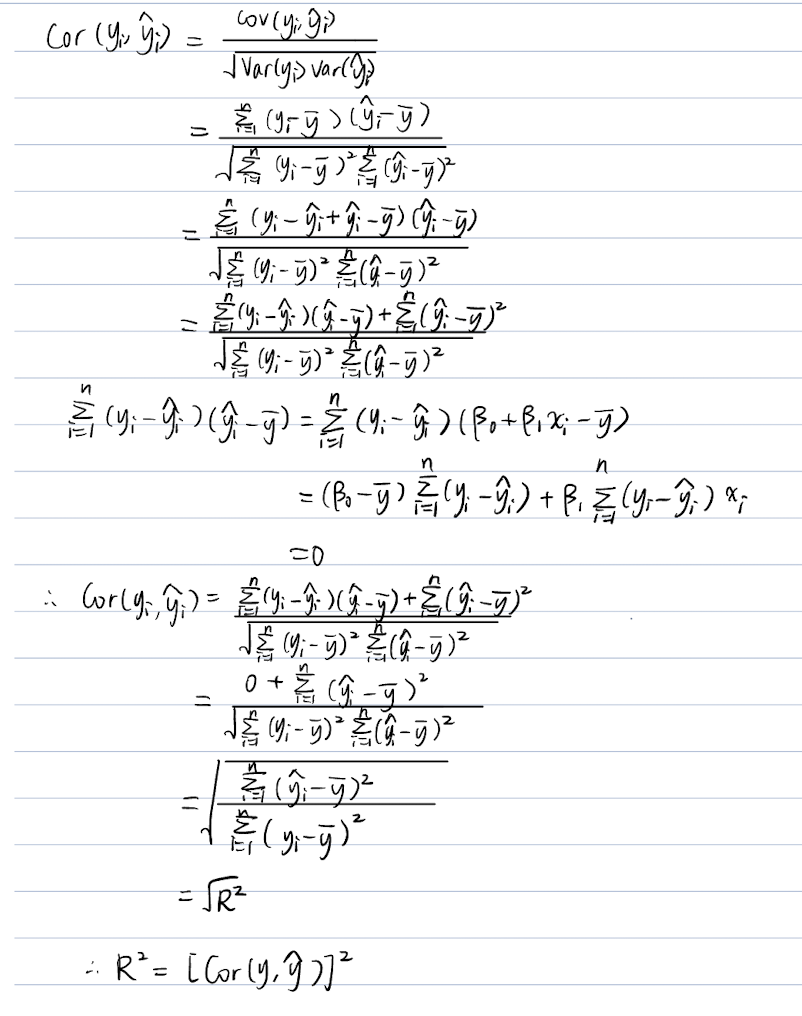